In [87]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
import cv2

In [89]:
!unzip'/content/Flowers-Dataset.zip'

/bin/bash: unzip/content/Flowers-Dataset.zip: No such file or directory


In [90]:
img=cv2.imread('/content/44079668_34dfee3da1_n.jpg')
img

array([[[177, 118, 108],
        [183, 127, 116],
        [180, 126, 115],
        ...,
        [200, 136, 125],
        [200, 138, 127],
        [202, 140, 129]],

       [[177, 118, 108],
        [182, 126, 115],
        [181, 127, 116],
        ...,
        [202, 143, 127],
        [204, 145, 129],
        [206, 147, 131]],

       [[182, 123, 113],
        [189, 130, 120],
        [187, 131, 120],
        ...,
        [190, 137, 117],
        [193, 140, 120],
        [192, 142, 120]],

       ...,

       [[175, 207, 172],
        [120, 218, 194],
        [ 88, 211, 191],
        ...,
        [178, 137, 112],
        [174, 133, 108],
        [178, 135, 108]],

       [[175, 199, 159],
        [122, 213, 187],
        [ 89, 210, 190],
        ...,
        [172, 134, 110],
        [171, 131, 106],
        [173, 134, 106]],

       [[179, 187, 147],
        [126, 205, 178],
        [ 91, 203, 185],
        ...,
        [168, 132, 108],
        [167, 132, 106],
        [171, 134, 106]]

In [91]:
import matplotlib.pyplot as plt

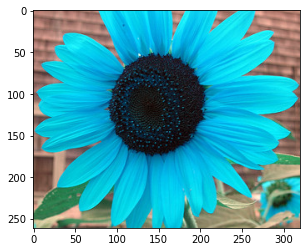

In [92]:
plt.imshow(img)

In [93]:
import numpy as np

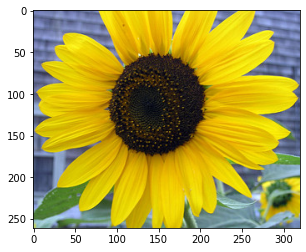

In [94]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

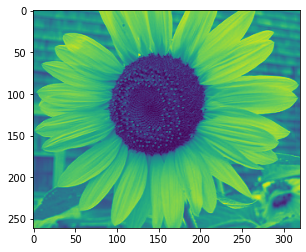

In [95]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

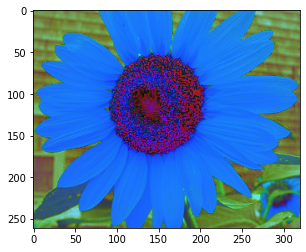

In [96]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2HLS))

**IMAGE RESIZE**

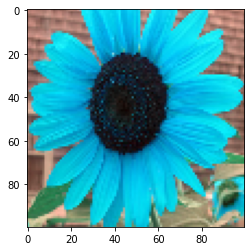

In [97]:
plt.imshow(cv2.resize(img,(100,100)))

In [98]:
rs = cv2.resize(img,(100,100))
print(img.shape)
print(rs.shape)

(261, 320, 3)
(100, 100, 3)


**IMAGE ROTATE**

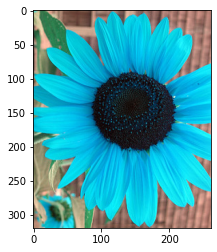

In [99]:
plt.imshow(cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE))

**IMAGE CROP**

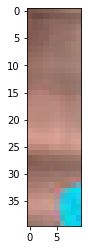

In [100]:
plt.imshow(img[10:50,20:30])

**IMAGE BLUR**

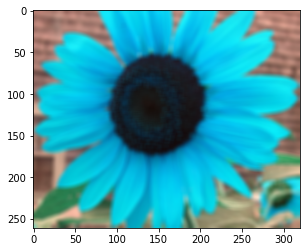

In [101]:
x=cv2.GaussianBlur(img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(x)

In [102]:
cv2.imwrite('image.jpg',img)

True

**IMAGE AUGMENTATION**

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [104]:
train_datagen=ImageDataGenerator(rescale=1./255, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [105]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [106]:
x_train=train_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [107]:
x_test=test_datagen.flow_from_directory(r"/content/drive",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 4 images belonging to 4 classes.


In [108]:
x_train.class_indices

{'.Trash-0': 0,
 '.file-revisions-by-id': 1,
 '.shortcut-targets-by-id': 2,
 'MyDrive': 3}

**INITIALIZING CNN AND CREATE MODEL**

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

**ADD LAYERS**

In [110]:
model=Sequential()

**INPUT LAYERS(CONVOLUTION,MAXPOOLING,FLATTEN)**

In [111]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [112]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [113]:
model.add(Flatten())

In [114]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


**HIDDEN LAYERS**

In [115]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

**OUTPUT LAYERS**

In [116]:
model.add(Dense(5,activation='softmax'))

In [117]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [118]:
len(x_train)

1

**SAVE THE MODEL**

In [119]:
model.save('Flowers_classification_model1.h5')

**TEST THE MODEL**

In [120]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [121]:
# Load the model
model=load_model('Flowers_classification_model1.h5')

In [122]:
img=image.load_img(r"/content/44079668_34dfee3da1_n.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
# x_train.class_indices
index=['daisy','dandelion','rose','sunflower','tulip']
index[y[0]]

1/1 [==============================] - 7s 7s/step


'sunflower'